<a href="https://colab.research.google.com/github/sakthi-005/Week-1/blob/main/intrusion_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


SIMPLE INTRUSION DETECTION SYSTEM WITH SUPPORT VECTOR MACHINE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [4]:
# Load dataset
file_path = '/content/Tuesday-WorkingHours.pcap_ISCX.csv'
df = pd.read_csv(file_path)

In [5]:
# Display basic info
display(df.head())
print(df.info())

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180861 entries, 0 to 180860
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             180861 non-null  int64  
 1    Flow Duration                180861 non-null  int64  
 2    Total Fwd Packets            180861 non-null  int64  
 3    Total Backward Packets       180861 non-null  int64  
 4   Total Length of Fwd Packets   180861 non-null  int64  
 5    Total Length of Bwd Packets  180861 non-null  int64  
 6    Fwd Packet Length Max        180861 non-null  int64  
 7    Fwd Packet Length Min        180861 non-null  int64  
 8    Fwd Packet Length Mean       180861 non-null  float64
 9    Fwd Packet Length Std        180860 non-null  float64
 10  Bwd Packet Length Max         180860 non-null  float64
 11   Bwd Packet Length Min        180860 non-null  float64
 12   Bwd Packet Length Mean       180860 non-nul

In [6]:
# Handle missing values
df.dropna(inplace=True)

In [7]:
# Encode categorical labels if applicable
if 'Label' in df.columns:
    label_encoder = LabelEncoder()
    df['Label'] = label_encoder.fit_transform(df['Label'])

In [12]:
# Separate features and target
print(df.columns)
df.columns = df.columns.str.strip()
X = df.drop(columns=['Label'])
y = df['Label']

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [15]:
#fix infinite and NaN values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)  # You can use dropna() instead if preferred


In [16]:
# Normalize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [22]:
# Evaluate model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9951
Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     34415
 FTP-Patator       0.95      1.00      0.97      1558
 SSH-Patator       0.99      0.51      0.67       184

    accuracy                           1.00     36157
   macro avg       0.98      0.84      0.88     36157
weighted avg       1.00      1.00      0.99     36157



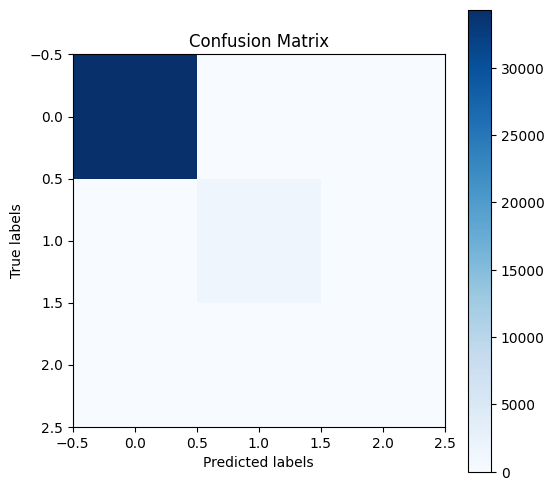

In [23]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()